# Necessary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data

#### disponível em: https://www.kaggle.com/jessemostipak/hotel-booking-demand/code

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## Clean up the data!

In [14]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# transformando valores da varivel em int e substituindo NaN por moda
df['children'] = pd.to_numeric(df['children'], downcast='integer')
df['children'].loc[(df['children'].isna())] = int(df['children'].mode())

In [6]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [7]:
df['country'].describe()

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object

In [13]:
df['country'].loc[(df['country'].isna())] = 'PRT'

## Task 1: Which month has the most reservation canceled?

In [43]:
result = df.groupby(df['arrival_date_month']).sum()
result['is_canceled']

arrival_date_month
April        4524
August       5239
December     2371
February     2696
January      1807
July         4742
June         4535
March        3149
May          4677
November     2122
October      4246
September    4116
Name: is_canceled, dtype: int64

In [28]:
not_canceled = df.loc[df['is_canceled'] == 0]
not_canceled = not_canceled.groupby(df['arrival_date_month']).count()
not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,6565,6565,6565,6565,6565,6565,6565,6565,6565,6565,...,6565,5615,465,6565,6565,6565,6565,6565,6565,6565
August,8638,8638,8638,8638,8638,8638,8638,8638,8638,8638,...,8638,7668,237,8638,8638,8638,8638,8638,8638,8638
December,4409,4409,4409,4409,4409,4409,4409,4409,4409,4409,...,4409,3454,321,4409,4409,4409,4409,4409,4409,4409
February,5372,5372,5372,5372,5372,5372,5372,5372,5372,5372,...,5372,4053,606,5372,5372,5372,5372,5372,5372,5372
January,4122,4122,4122,4122,4122,4122,4122,4122,4122,4122,...,4122,3011,400,4122,4122,4122,4122,4122,4122,4122
July,7919,7919,7919,7919,7919,7919,7919,7919,7919,7919,...,7919,7133,255,7919,7919,7919,7919,7919,7919,7919
June,6404,6404,6404,6404,6404,6404,6404,6404,6404,6404,...,6404,5703,331,6404,6404,6404,6404,6404,6404,6404
March,6645,6645,6645,6645,6645,6645,6645,6645,6645,6645,...,6645,5311,673,6645,6645,6645,6645,6645,6645,6645
May,7114,7114,7114,7114,7114,7114,7114,7114,7114,7114,...,7114,6038,657,7114,7114,7114,7114,7114,7114,7114


In [46]:
confirmed = np.array(not_canceled['is_canceled'])

canceled = np.array(result['is_canceled'])

print(len(confirmed), len(canceled))

12 12


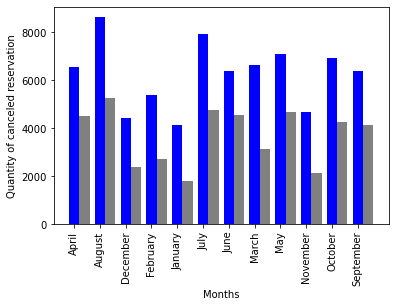

In [62]:
w = 0.4
months = [month for month, df in df.groupby('arrival_date_month')]
bar1 = np.arange(len(confirmed))
bar2 = [i+w for i in bar1]

plt.bar(bar1, confirmed,w, label='Check-Out', color='blue')
plt.bar(bar2, canceled,w, label='Canceled', color='grey')

plt.xticks(bar1,months,rotation='vertical', size=10)

plt.xlabel("Months")
plt.ylabel("Quantity of canceled reservation")
plt.show()

## Task 2: Which country had the most canceled reservation?

In [18]:
result = df.groupby(df['country']).sum()
result['is_canceled']

country
ABW      0
AGO    205
AIA      0
ALB      2
AND      5
      ... 
VGB      1
VNM      2
ZAF     31
ZMB      1
ZWE      2
Name: is_canceled, Length: 177, dtype: int64

In [19]:
result

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
country,,,,,,,,,,,,,,,,,,,,
ABW,0,252,4033,45,32,2,5,5,0.0,0,0,0,0,0,24.0,0.0,0,256.68,0,3
AGO,205,8361,729867,7982,5502,827,2111,570,77.0,5,18,14,32,137,7098.0,2159.0,0,42398.50,11,183
AIA,0,0,2016,28,8,2,2,2,2.0,0,0,0,0,0,8.0,0.0,0,265.00,0,0
ALB,2,1241,24194,293,201,12,28,21,0.0,1,0,0,0,3,808.0,466.0,0,1012.24,0,8
AND,5,329,14116,171,103,9,22,15,4.0,0,0,0,0,1,1228.0,0.0,0,1418.57,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,1,109,2016,32,5,1,2,2,0.0,0,0,0,0,0,9.0,0.0,0,100.50,0,0
VNM,2,673,16131,280,152,5,16,17,0.0,0,0,0,0,1,837.0,0.0,0,986.14,0,5
ZAF,31,5612,161316,1964,1289,72,163,143,17.0,0,1,0,1,22,5702.0,218.0,0,8891.82,4,62


In [20]:
most_canceled_reservation_country = result.nlargest(10,['is_canceled'])
most_canceled_reservation_country

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
country,,,,,,,,,,,,,,,,,,,,
PRT,27586,5631011,98940853,1352715,776941,36207,106748,86799,3481.0,441,3254,9248,15398,8354,3683806.0,793760.0,196988,4501813.24,3206,18088
GBR,2453,1545501,24455896,323614,190608,16297,41795,23223,1253.0,92,107,118,177,3435,1262628.0,204535.0,6345,1164651.54,564,8259
ESP,2177,469968,17273768,243038,134135,7106,19252,16615,1412.0,126,90,61,142,2063,886119.0,48620.0,4050,1002417.13,1196,6082
FRA,1934,857385,20999194,280592,159299,10130,26417,20291,1211.0,77,78,64,218,2271,532815.0,35011.0,24051,1141663.93,577,7572
ITA,1333,341444,7593022,101585,60347,3615,8707,7384,456.0,16,40,4,67,963,147740.0,24004.0,5525,429128.95,127,2464
DEU,1218,1000998,14692966,194433,117827,7134,18653,13703,477.0,18,25,13,42,1660,371015.0,27754.0,14895,760739.16,243,4702
IRL,832,406507,6804918,91591,51202,4889,12477,6570,315.0,24,31,618,38,881,450952.0,12712.0,130,331398.58,84,2628
BRA,830,185237,4484445,57088,36698,2282,5477,4450,393.0,24,14,24,25,589,138625.0,3369.0,512,246875.87,139,1830
USA,501,161869,4228326,56356,32269,1793,4021,3950,362.0,6,19,0,12,710,147321.0,7254.0,2403,257914.75,142,1604


In [21]:
most_canceled_reservation_country.reset_index(inplace=True)

In [22]:
most_canceled_reservation_country

,country,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,PRT,27586,5631011,98940853,1352715,776941,36207,106748,86799,3481.0,...,3254,9248,15398,8354,3683806.0,793760.0,196988,4501813.24,3206,18088
1,GBR,2453,1545501,24455896,323614,190608,16297,41795,23223,1253.0,...,107,118,177,3435,1262628.0,204535.0,6345,1164651.54,564,8259
2,ESP,2177,469968,17273768,243038,134135,7106,19252,16615,1412.0,...,90,61,142,2063,886119.0,48620.0,4050,1002417.13,1196,6082
3,FRA,1934,857385,20999194,280592,159299,10130,26417,20291,1211.0,...,78,64,218,2271,532815.0,35011.0,24051,1141663.93,577,7572
4,ITA,1333,341444,7593022,101585,60347,3615,8707,7384,456.0,...,40,4,67,963,147740.0,24004.0,5525,429128.95,127,2464
5,DEU,1218,1000998,14692966,194433,117827,7134,18653,13703,477.0,...,25,13,42,1660,371015.0,27754.0,14895,760739.16,243,4702
6,IRL,832,406507,6804918,91591,51202,4889,12477,6570,315.0,...,31,618,38,881,450952.0,12712.0,130,331398.58,84,2628
7,BRA,830,185237,4484445,57088,36698,2282,5477,4450,393.0,...,14,24,25,589,138625.0,3369.0,512,246875.87,139,1830
8,USA,501,161869,4228326,56356,32269,1793,4021,3950,362.0,...,19,0,12,710,147321.0,7254.0,2403,257914.75,142,1604
9,BEL,474,233421,4722259,62990,37336,2456,6175,4588,311.0,...,17,198,24,504,124176.0,20034.0,248,266631.51,133,2049


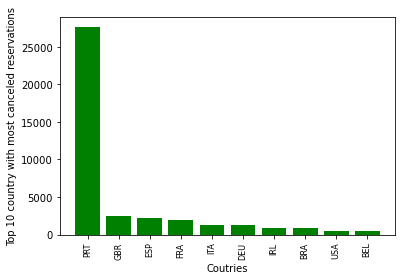

In [23]:
countries = [country for country in most_canceled_reservation_country['country']]


plt.bar(countries, most_canceled_reservation_country['is_canceled'], color='green')
plt.xticks(countries, rotation='vertical', size=8)
plt.xlabel("Coutries")
plt.ylabel("Top 10 country with most canceled reservations")
plt.show()